In [1]:
#Libraries:
#Tensors:
import torch
import numpy as np

#Plotting in 2d/3d:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Ellipse
from matplotlib.colors import Normalize
import matplotlib.cm as cm
%matplotlib inline

#Tools:
from itertools import product, combinations
import sys
import math
import csv
import os 

sys.path.append("../../")
import Kernel_and_GP_tools as GP
import My_Tools
import Tasks.GP_Data.GP_loader as Dataloader

In [2]:
def plot_context_and_VF(ax,X_Context=None,Y_Context=None,X_Target=None,Y_Target=None,scale=20,colormap='viridis',facecolor='black',color=None,x1_lim=[-10,10],x2_lim=[-10,10]):
    '''
    Inputs: ax - matplotlib.axes._subplots.AxesSubplot - axis to plot on
            X_Context, Y_Context, X_Target, Y_Target - torch.Tensor - shape (n_c,2)/ (n_t,2) context and target set to plot
            scale - float - scale for plotting quiver arrows
            colormap - string - name of colormap to use 
            x1_lim,x2_lim - [float,float] - range of x1- and x2-axis
    Output: plot the context set in red and the target set (i.e. the ground truth) together in one plot
    '''
    #Set limits of axis and background color, get the width:
    ax.set_xlim(x1_lim)
    ax.set_ylim(x2_lim)
    if facecolor is not None:
        ax.set_facecolor('black')
    width=ax.get_xlim()[1]-ax.get_xlim()[0]
    #Plot target vector field
    if X_Target is not None and Y_Target is not None:
        if color is not None:
            ax.quiver(X_Target[:,0],X_Target[:,1],Y_Target[:,0],Y_Target[:,1],color=color,
            pivot='mid',scale_units='width',scale=width*scale,headlength=4, headwidth = 2,width=0.005,alpha=1)
        else:
            ax.quiver(X_Target[:,0],X_Target[:,1],Y_Target[:,0],Y_Target[:,1],Y_Target.norm(dim=1),
            cmap=cm.get_cmap(colormap),pivot='mid',scale_units='width',scale=width*scale,headlength=4, headwidth = 2,width=0.005,alpha=1)
    #Plot context set:
    if X_Context is not None and Y_Context is not None:
        ax.quiver(X_Context[:,0],X_Context[:,1],Y_Context[:,0],Y_Context[:,1],
            color='red',pivot='mid',label='Context set',scale_units='width',scale=width*scale,headlength=4, headwidth = 2,width=0.005)   
    return(ax)

In [3]:
rbf_data=Dataloader.give_GP_data_set(5,50,'rbf',data_set='train',file_path="",n_total=None,transform=True)
div_data=Dataloader.give_GP_data_set(5,50,'div_free',data_set='train',file_path="",n_total=None,transform=True)
curl_data=Dataloader.give_GP_data_set(5,50,'curl_free',data_set='train',file_path="",n_total=None,transform=True)

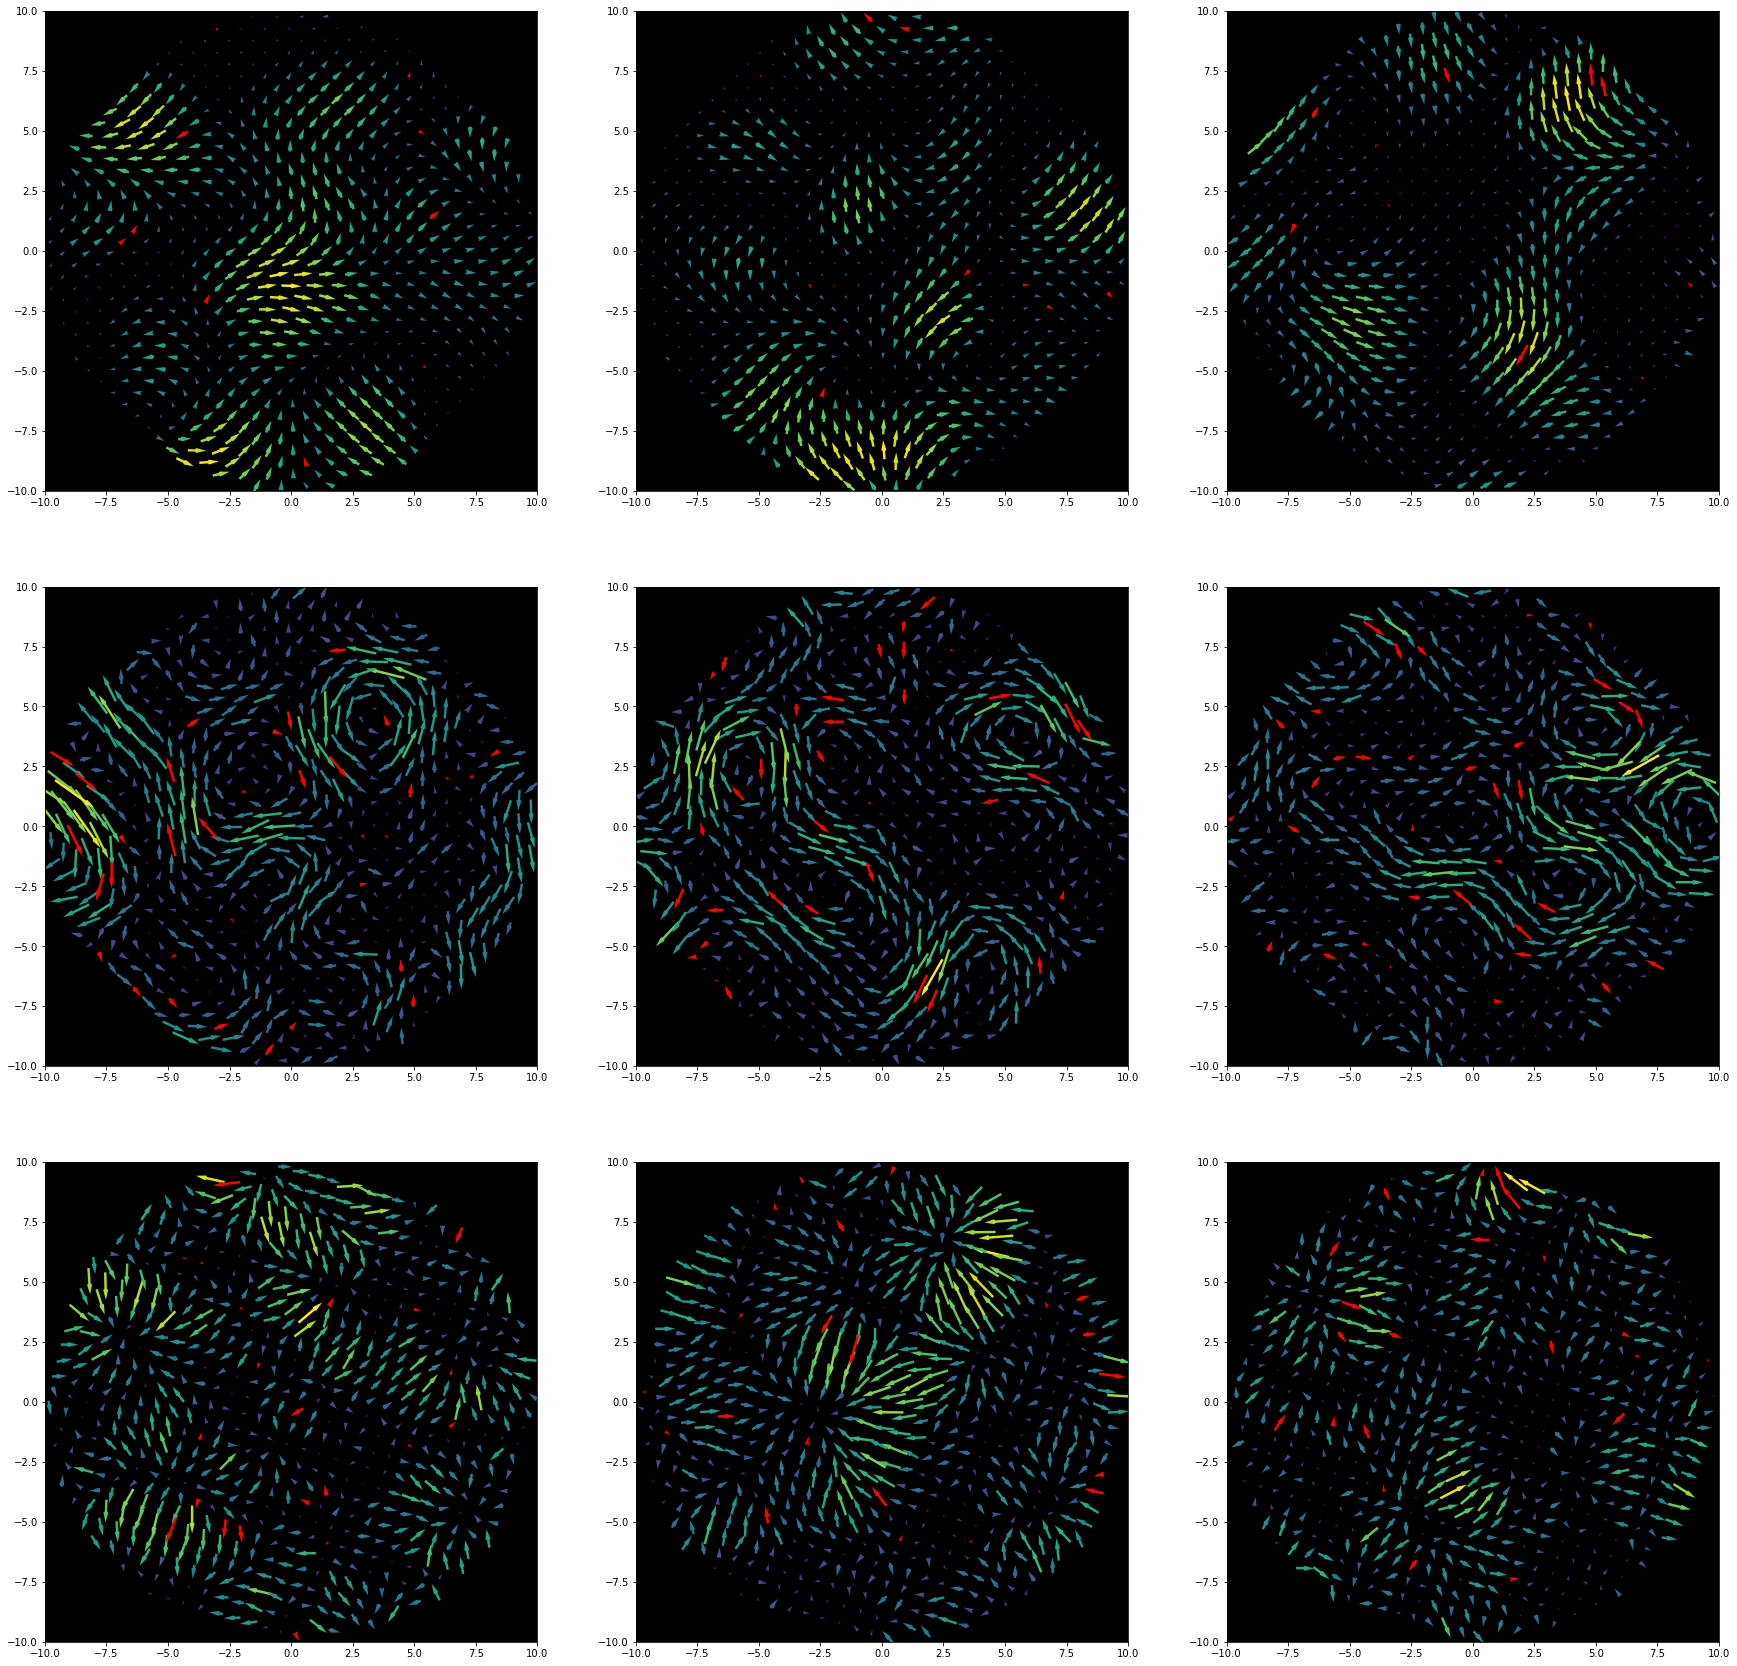

In [6]:
batch_size=3
fig,ax=plt.subplots(3,batch_size,figsize=(30,30))
x_c,y_c,x_t,y_t=rbf_data.get_rand_batch(batch_size=batch_size,n_context_points=None,cont_in_target=False)
for it in range(batch_size):
    plot_context_and_VF(ax[0][it],X_Context=x_c[it],Y_Context=y_c[it],X_Target=x_t[it],Y_Target=y_t[it],scale=10,colormap='viridis',facecolor='black',color=None,x1_lim=[-10,10],x2_lim=[-10,10])
x_c,y_c,x_t,y_t=div_data.get_rand_batch(batch_size=batch_size,n_context_points=None,cont_in_target=False)
for it in range(batch_size):
    plot_context_and_VF(ax[1][it],X_Context=x_c[it],Y_Context=y_c[it],X_Target=x_t[it],Y_Target=y_t[it],scale=1,colormap='viridis',facecolor='black',color=None,x1_lim=[-10,10],x2_lim=[-10,10])
x_c,y_c,x_t,y_t=curl_data.get_rand_batch(batch_size=batch_size,n_context_points=None,cont_in_target=False)
for it in range(batch_size):
    plot_context_and_VF(ax[2][it],X_Context=x_c[it],Y_Context=y_c[it],X_Target=x_t[it],Y_Target=y_t[it],scale=1,colormap='viridis',facecolor='black',color=None,x1_lim=[-10,10],x2_lim=[-10,10])

tensor(9.8096)